<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory and interactive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

1. How long does the person wait to donate the blood from the current donation date?
2. What is the maximum donation limit?
3. How often people donate bloods and whats the reason behind it?

## Actual Question
Choose the **one** question that should be answered.
1. Has the person donated blood in March 2007? 

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [ ]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

In [9]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data'
data_df = pd.read_csv(url)

In [13]:
data_df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



In [4]:
# Read data in pandas


df = pd.read_csv('../../DATA/transfusion.data')
df

# Check data has loaded correctly

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [14]:
df.shape

(748, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [17]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [18]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [ ]:
df.columns = ['recency', 'frequency', 'monetary', 'time', 'donated_mar_2007']

In [20]:
df.head(2)

,recency,frequency,monetary,time,donated_mar_2007
0,2,50,12500,98,1
1,0,13,3250,28,1


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent the absence of data)

In [44]:
print(f"Number of Features:",df.shape[1])
for i, n in enumerate(df.columns, start=1):
    print(i, n)

Number of Features: 5
1 recency
2 frequency
3 monetary
4 time
5 donated_mar_2007


In [49]:
print(f"Data types:")
df.dtypes

Data types:


recency             int64
frequency           int64
monetary            int64
time                int64
donated_mar_2007    int64
dtype: object

In [59]:
print(f'Domains, Intervals')
for c in df.columns:
    x = df[c].unique()
    x.sort()
    print((c, df[c].min(), df[c].max()))
    print('values:',x)

Domains, Intervals
('recency', 0, 74)
values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 25
 26 35 38 39 40 72 74]
('frequency', 1, 50)
values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 26 33 34 38 41 43 44 46 50]
('monetary', 250, 12500)
values: [  250   500   750  1000  1250  1500  1750  2000  2250  2500  2750  3000
  3250  3500  3750  4000  4250  4500  4750  5000  5250  5500  5750  6000
  6500  8250  8500  9500 10250 10750 11000 11500 12500]
('time', 2, 98)
values: [ 2  3  4  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 49 50 51 52 53 54 55
 57 58 59 60 61 62 63 64 65 69 70 71 72 73 74 75 76 77 78 79 81 82 83 86
 87 88 89 93 95 98]
('donated_mar_2007', 0, 1)
values: [0 1]


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:

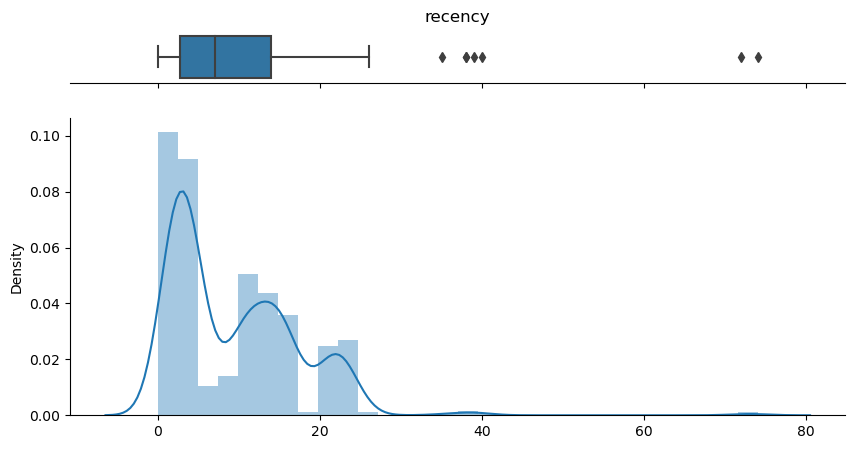

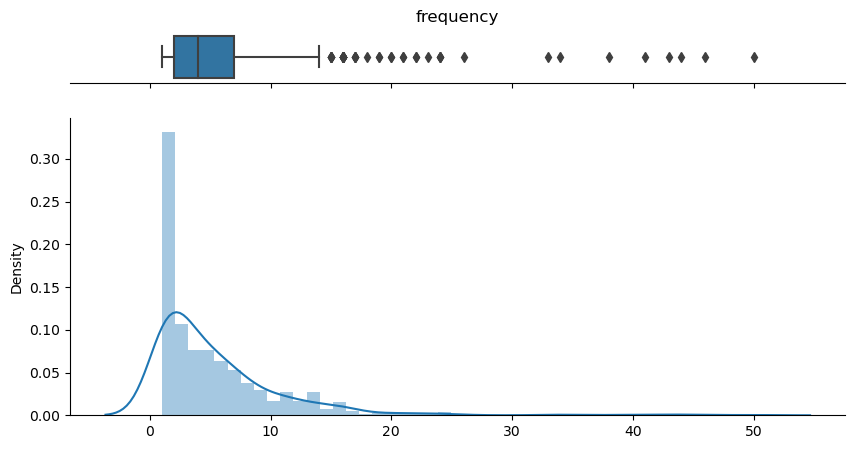

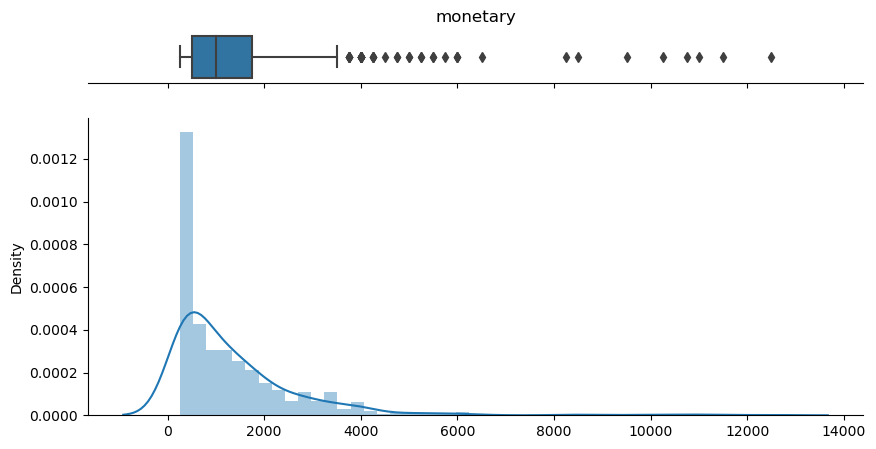

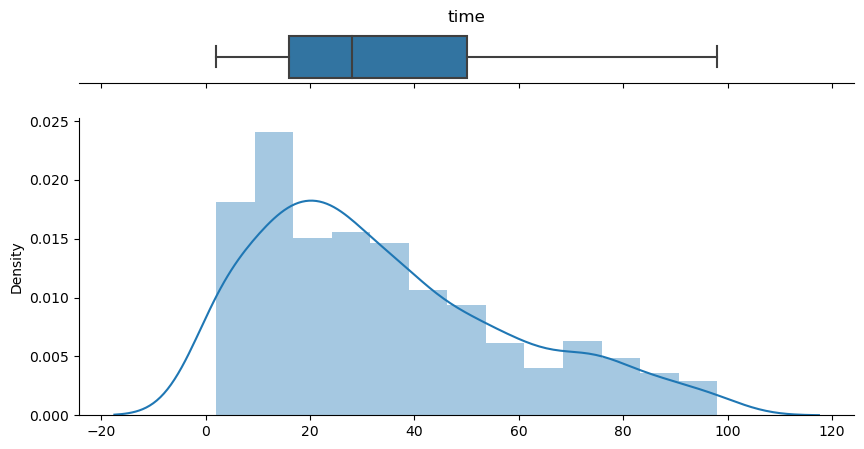

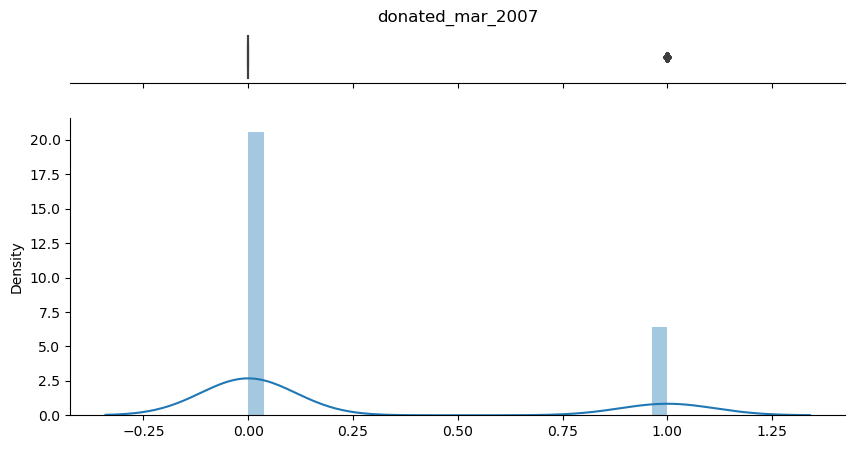

In [71]:
# Checking for Outliers
for c in df.columns:
    fig, ax = plt.subplots(2, figsize = (10, 5),sharex = True, gridspec_kw = {'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)
    
    ax_hist = ax[1]
    
    if c == 'Donated_Mar_2007':       
        ax_hist = sns.distplot(df[c], kde=False, ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
    else:
        ax_hist = sns.distplot(df[c], ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
        

plt.show()

In [76]:
print('Null Values:')
for c in df.columns:
    print(c, df[c].isnull().sum())

Null Values:
recency 0
frequency 0
monetary 0
time 0
donated_mar_2007 0


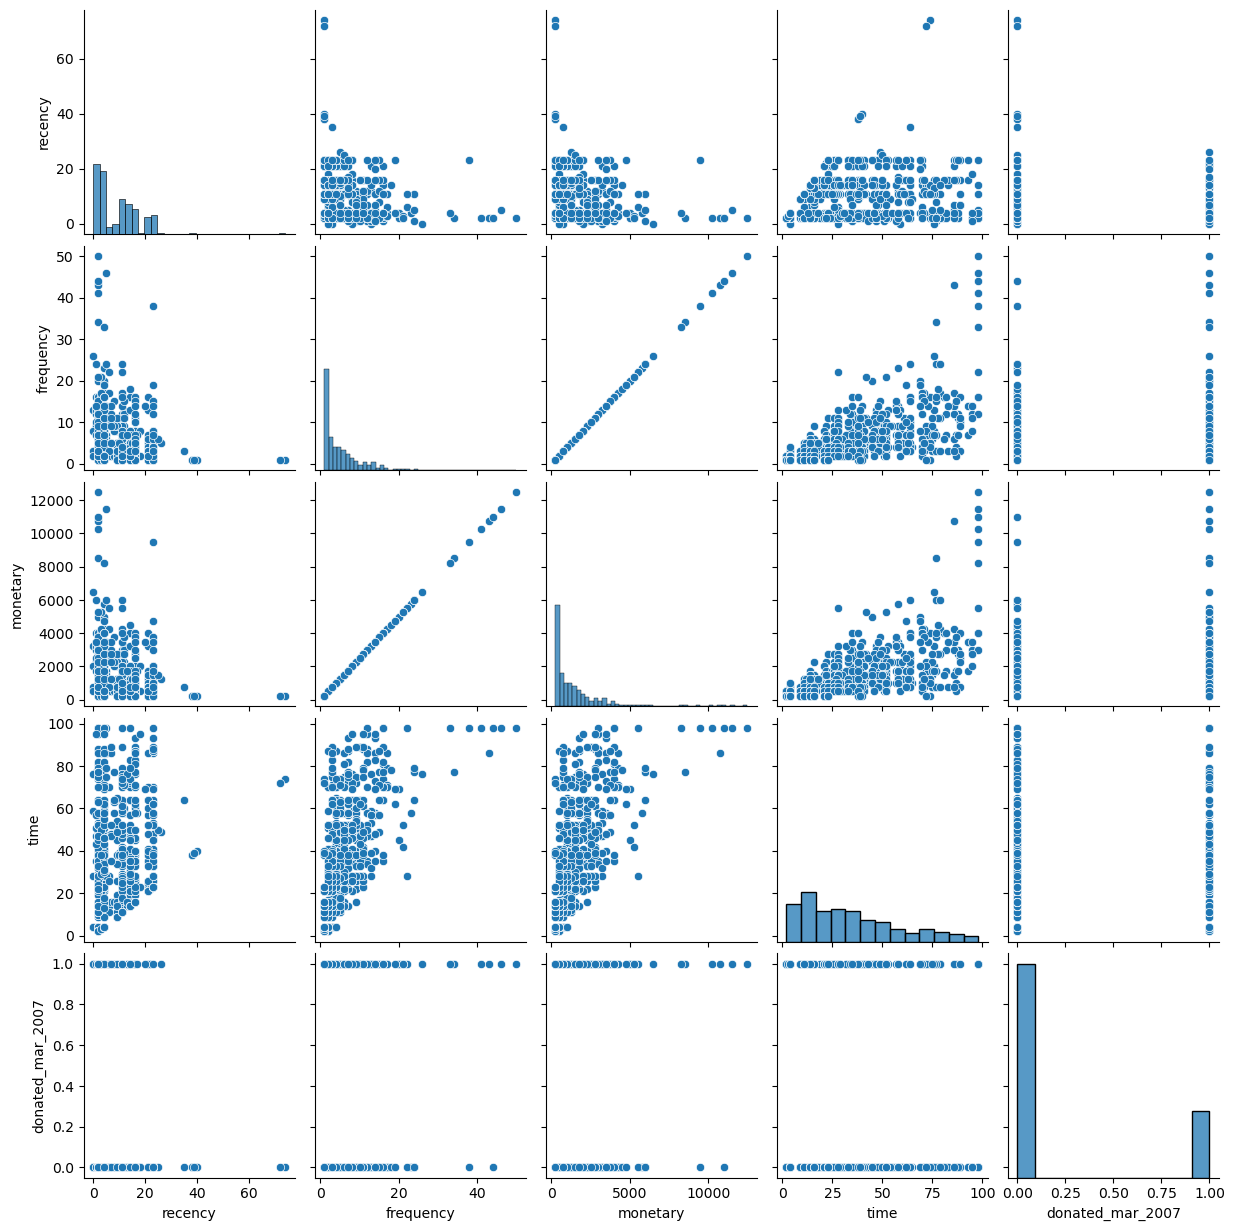

In [77]:
# Perform EDA by investigating each of the points above 
sns.pairplot(data=df)

In [81]:
df.donated_mar_2007=df.donated_mar_2007.astype(str)

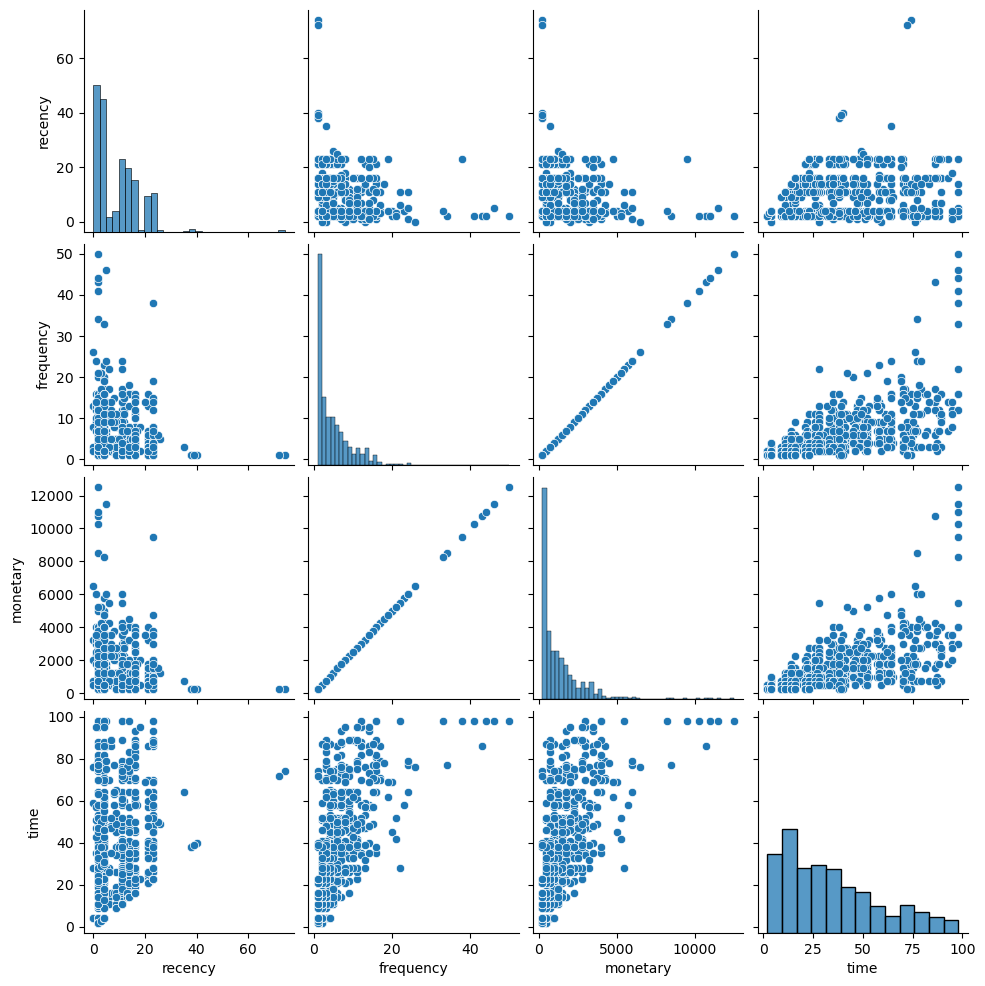

In [84]:
sns.pairplot(data=df)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

In [86]:
# Filter/subset/clean the data according to your EDA findings

features = ['recency', 'frequency', 'monetary', 'time']
outcome = 'donated_mar_2007'


X = df[features].copy()
y = df[outcome].copy()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [101]:
print('- What are the input variables (features)?')
print('  - %s' % ', '.join(features))
print('- Is there an output variable (label)?')
print('  - %s' % ('Yes' if outcome else 'No'))
print('- If there is an output variable:')
print('    - Which one is it?')
print('      - %s' % outcome)
print('    - What is its type?')
print('      - %s' % y.dtypes)
print('  - What type of Modelling is it?')
print('    - [%s] Supervised' % ('x' if outcome else ' '))
print('    - [%s] Unsupervised' % (' ' if outcome else 'x'))
print('  - What type of Modelling is it?')
print('    - [%s] Regression' % ('x' if y.dtypes != 'object' else ' '))
print('    - [%s] Classification (binary)' % ('x' if (y.dtypes == 'object') and (len(y.unique()) == 2) else ' '))
print('    - [%s] Classification (multi-class)' % ('x' if (y.dtypes == 'object') and (len(y.unique()) != 2) else ' '))
print('    - [%s] Clustering' % (' ' if outcome else 'x'))

- What are the input variables (features)?
  - recency, frequency, monetary, time
- Is there an output variable (label)?
  - Yes
- If there is an output variable:
    - Which one is it?
      - donated_mar_2007
    - What is its type?
      - object
  - What type of Modelling is it?
    - [x] Supervised
    - [ ] Unsupervised
  - What type of Modelling is it?
    - [ ] Regression
    - [x] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [87]:
# Split your data
test_size = X.shape[0] - 500

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_size,
                                                    random_state = 100666001,
                                                    stratify = y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [88]:
# Choose a model or models
model = RandomForestClassifier(random_state=42)
print(model)

RandomForestClassifier(random_state=42)


# Step 9: Fit the Model

In [89]:
# Fit model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [90]:
# Evaluate model against training set

def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(float)
    prediction_int = np.round(prediction)

    print('Accuracy : %.4f [TP / N]         Best: 1, Worst: 0' %
          accuracy_score(actual, prediction_int))
    msg = '           Proportion of predicted labels that match the true labels.'
    print(msg)
    print('Precision: %.4f [TP / (TP + FP)] Best: 1, Worst: 0' %
          precision_score(actual, prediction_int))
    msg = '           Not to label a negative sample as positive.'
    print(msg)
    print('Recall   : %.4f [TP / (TP + FN)] Best: 1, Worst: 0' %
          recall_score(actual, prediction_int))
    msg = '           Find all the positive samples.'
    print(msg)
    print('ROC AUC  : %.4f                  Best: 1, Worst: < 0.5' %
          roc_auc_score(actual, prediction))
    print('-' * 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Blues', ax=ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')

    plt.show()

In [91]:
y_train_prob = model.predict_proba(X_train)[:,1]

Accuracy : 0.9440 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.9099 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.8487 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.9771                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


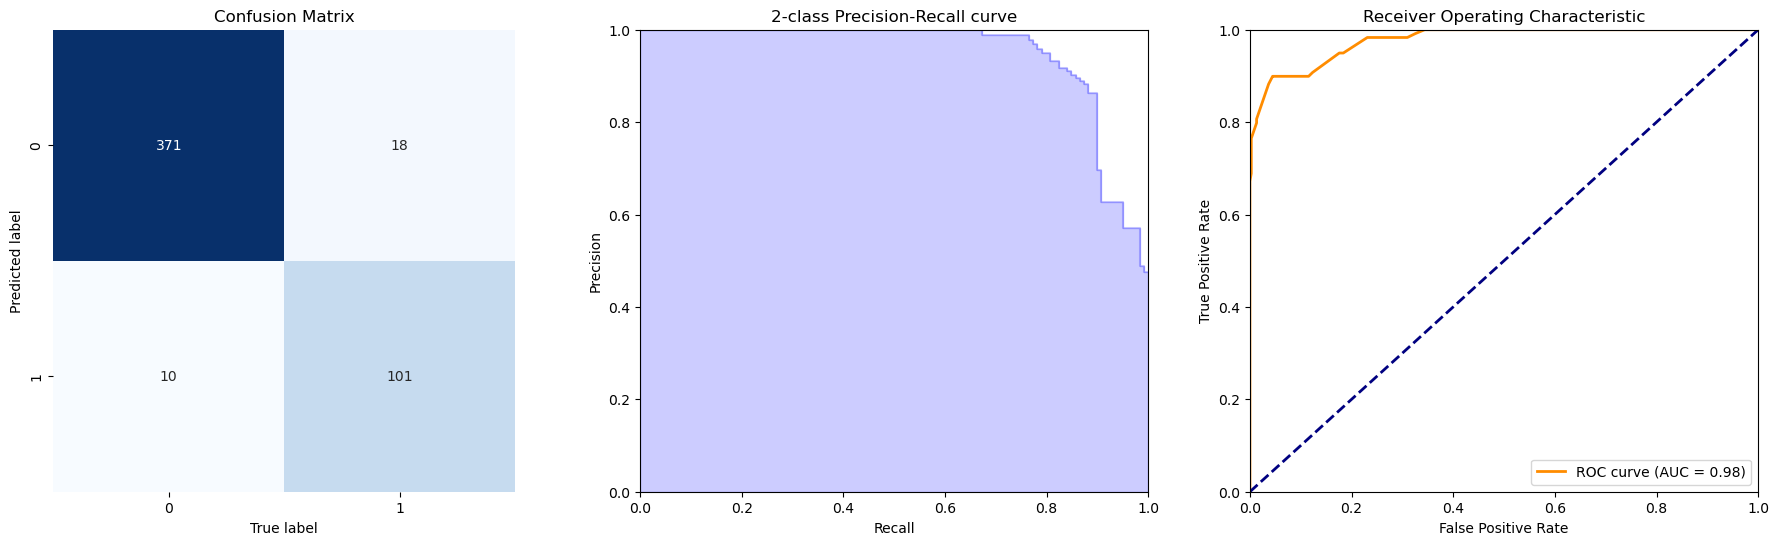

In [92]:
show_summary_report(y_train, y_train_prob)

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [93]:
y_test_prob = model.predict_proba(X_test)[:,1]

Accuracy : 0.7339 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.4314 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.3729 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.6658                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


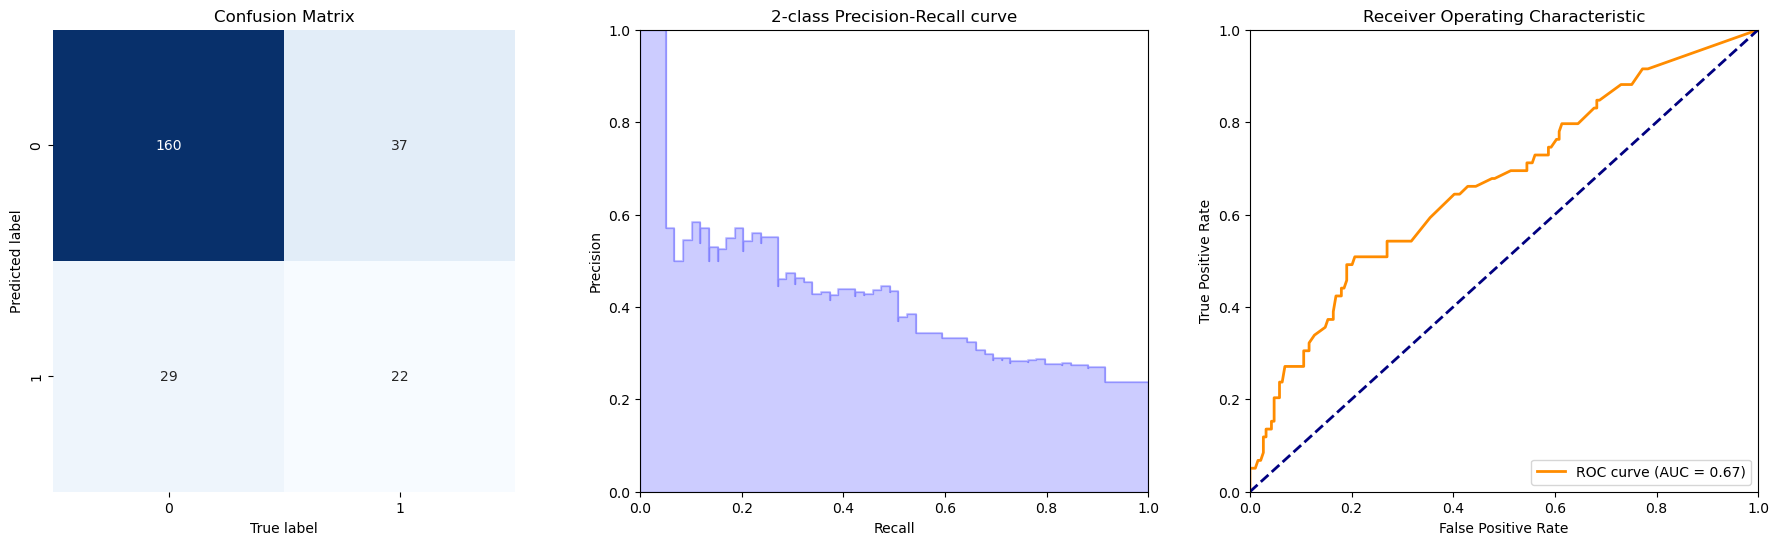

In [94]:
# Evaluate model against test set
show_summary_report(y_test, y_test_prob)

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

This model cannot be used now because it has more false positive than actual positive which cannot be use to predict that if the person has donated on March 2007. If there is some emergency situaiton, then the model prediction will go wrong and we might not have enough blood in the transfusion centres.



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



